**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


## Import cCREs

In [2]:
### set file path
fdiry = file.path(FD_RES, "source", "cCREs")
fname = "ENCFF971AHO_ENCFF847JMY_ENCFF779QTH_ENCFF405AYC.7group.bed"
fpath = file.path(fdiry, fname)

### import data
cnames = c("Chrom", "Start", "End", "Name", "Score", "Strand", "Value1", "Value2", "Value3", "Label1", "Label2")
dat_ccre = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)

### show table
print(dim(dat_ccre))
head(dat_ccre)

[1] 926535     11


Chrom,Start,End,Name,Score,Strand,Value1,Value2,Value3,Label1,Label2
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,181251,181601,EH38E1310153,0,.,181251,181601,"6,218,147",DNase-only,All-data/Full-classification
chr1,190865,191071,EH38E1310154,0,.,190865,191071,"225,225,225",Low-DNase,All-data/Full-classification
chr1,778562,778912,EH38E1310158,0,.,778562,778912,"255,0,0","PLS,CTCF-bound",All-data/Full-classification
chr1,779086,779355,EH38E1310159,0,.,779086,779355,"255,0,0",PLS,All-data/Full-classification
chr1,779727,780060,EH38E1310160,0,.,779727,780060,"225,225,225",Low-DNase,All-data/Full-classification
chr1,790397,790626,EH38E1310162,0,.,790397,790626,"225,225,225",Low-DNase,All-data/Full-classification


In [3]:
dat_ccre = dat_ccre %>% 
    dplyr::select(Chrom, Start, End, Name, Label1) %>% 
    dplyr::rename(Label = Label1) %>% 
    distinct

### show table
print(dim(dat_ccre))
head(dat_ccre)

[1] 926535      5


Chrom,Start,End,Name,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr1,181251,181601,EH38E1310153,DNase-only
chr1,190865,191071,EH38E1310154,Low-DNase
chr1,778562,778912,EH38E1310158,"PLS,CTCF-bound"
chr1,779086,779355,EH38E1310159,PLS
chr1,779727,780060,EH38E1310160,Low-DNase
chr1,790397,790626,EH38E1310162,Low-DNase


## Import coverage data

In [133]:
### set file path
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Ratio.GATA1.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)
dat$Source = "ASTARR"

### assign
dat_astarr_gata1 = dat
print(dim(dat))
head(dat)

[1] 6000453       8


Chrom,Start,End,Strand,Region,Input,Output,Source
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
chrX,47786500,47786501,stranded_neg,GATA1,0,0,ASTARR
chrX,47786500,47786501,stranded_pos,GATA1,0,0,ASTARR
chrX,47786500,47786501,unstranded,GATA1,0,0,ASTARR
chrX,47786501,47786502,stranded_neg,GATA1,0,0,ASTARR
chrX,47786501,47786502,stranded_pos,GATA1,0,0,ASTARR
chrX,47786501,47786502,unstranded,GATA1,0,0,ASTARR


```
#dat_astarr_gata1_uns = dat_astarr_gata1 %>% dplyr::filter(Strand == "unstranded")
#dat_astarr_gata1_pos = dat_astarr_gata1 %>% dplyr::filter(Strand == "stranded_pos")
#dat_astarr_gata1_neg = dat_astarr_gata1 %>% dplyr::filter(Strand == "stranded_neg")
#print(dim(dat_astarr_gata1_uns)) #= dat_astarr_gata1 %>% dplyr::filter(Strand == "unstranded")
#print(dim(dat_astarr_gata1_pos)) #= dat_astarr_gata1 %>% dplyr::filter(Strand == "stranded_pos")
#print(dim(dat_astarr_gata1_neg)) #= dat_astarr_gata1 %>% dplyr::filter(Strand == "stranded_neg")
#[1] 2000151       7
#[1] 2000151       7
#[1] 2000151       7
```

In [ ]:
### set file path
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Ratio.MYC.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

### assign
dat_astarr_myc = dat
print(dim(dat))
head(dat)

In [ ]:
### set file path
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Ratio.FADS.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

### assign
dat_astarr_fads = dat
print(dim(dat))
head(dat)

In [164]:
### set file path
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "coverage")
fname = "Tile_K562_hg38_20200905_Ratio.GATA1.stranded_pos.perbase.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)
dat$Source = "TMPRA"
dat$Region = "GATA1"
dat$Strand = "stranded_pos"

### assign
dat_tmpra_gata1 = dat
print(dim(dat))
head(dat)

[1] 1820026       9


Chrom,Start,End,Input,Output,FC,Source,Region,Strand
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chrX,47786401,47786402,2117,10474,4.947567,TMPRA,GATA1,stranded_pos
chrX,47786402,47786403,2117,10474,4.947567,TMPRA,GATA1,stranded_pos
chrX,47786403,47786404,2117,10474,4.947567,TMPRA,GATA1,stranded_pos
chrX,47786404,47786405,2117,10474,4.947567,TMPRA,GATA1,stranded_pos
chrX,47786405,47786406,2117,10474,4.947567,TMPRA,GATA1,stranded_pos
chrX,47786406,47786407,2117,10474,4.947567,TMPRA,GATA1,stranded_pos


In [ ]:
### set file path
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "coverage")
fname = "Tile_K562_hg38_20200905_Ratio.MYC.stranded_pos.perbase.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

### assign
dat_tmpra_myc = dat
print(dim(dat))
head(dat)

In [ ]:
### set file path
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "coverage")
fname = "Tile_K562_hg38_20200905_Ratio.FADS.stranded_pos.perbase.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

### assign
dat_tmpra_fads_pos = dat
print(dim(dat))
head(dat)

In [ ]:
### set file path
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "coverage")
fname = "Tile_K562_hg38_20200905_Ratio.FADS.stranded_neg.perbase.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

### assign
dat_tmpra_fads_neg = dat
print(dim(dat))
head(dat)

## summarize coverage by cCREs

In [15]:
head(dat_ccre)

Chrom,Start,End,Name,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr1,181251,181601,EH38E1310153,DNase-only
chr1,190865,191071,EH38E1310154,Low-DNase
chr1,778562,778912,EH38E1310158,"PLS,CTCF-bound"
chr1,779086,779355,EH38E1310159,PLS
chr1,779727,780060,EH38E1310160,Low-DNase
chr1,790397,790626,EH38E1310162,Low-DNase


In [5]:
dat_cov = dat_astarr_gata1
tmp = range(c(dat_cov$Start, dat_cov$End))
start = tmp[1]
end   = tmp[2]

In [167]:
dat_cov = bind_rows(dat_astarr_gata1, dat_tmpra_gata1)
tmp   = range(c(dat_cov$Start, dat_cov$End))
start = tmp[1]
end   = tmp[2]
print(c(start, end))
head(dat_cov)

[1] 47786401 49786750


Chrom,Start,End,Strand,Region,Input,Output,Source,FC
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
chrX,47786500,47786501,stranded_neg,GATA1,0,0,ASTARR,NA
chrX,47786500,47786501,stranded_pos,GATA1,0,0,ASTARR,NA
chrX,47786500,47786501,unstranded,GATA1,0,0,ASTARR,NA
chrX,47786501,47786502,stranded_neg,GATA1,0,0,ASTARR,NA
chrX,47786501,47786502,stranded_pos,GATA1,0,0,ASTARR,NA
chrX,47786501,47786502,unstranded,GATA1,0,0,ASTARR,NA


In [168]:
dat_ann = dat_ccre %>% dplyr::filter(Chrom == "chrX", Start >= start, End <= end)
lst_ann = split(dat_ann, dat_ann$Name)
print(dim(dat_ann))
print(length(lst_ann))

[1] 507   5
[1] 507


In [169]:
res = lapply(lst_ann, function(dat){
    ### extract
    start = dat$Start
    end   = dat$End
    id1   = dat$Name
    id2   = dat$Label
    
    ### summarize coverage
    tmp   = dat_cov %>% 
        dplyr::filter(Start >= start, End <= end) %>%
        group_by(Strand, Region, Source) %>%
        summarise(
            Input   = mean(Input),
            Output  = mean(Output),
            .groups = "drop") %>%
        mutate(
            CCRE  = id1,
            Label = id2)
    return(tmp)
})

In [170]:
dat_res = bind_rows(res)

print(sum(dat_res$Input  == 0))
print(sum(dat_res$Output == 0))
head(dat_res)

[1] 0
[1] 1


Strand,Region,Source,Input,Output,CCRE,Label
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
stranded_neg,GATA1,ASTARR,1.293504e-04,2.247585e-04,EH38E2753817,Low-DNase
stranded_pos,GATA1,ASTARR,1.040677e-04,1.648701e-04,EH38E2753817,Low-DNase
stranded_pos,GATA1,TMPRA,1.593391e+02,1.344879e+03,EH38E2753817,Low-DNase
unstranded,GATA1,ASTARR,2.334181e-04,3.896286e-04,EH38E2753817,Low-DNase
stranded_neg,GATA1,ASTARR,2.170848e-05,1.002631e-06,EH38E2753819,Low-DNase
stranded_pos,GATA1,ASTARR,1.325526e-05,8.526271e-06,EH38E2753819,Low-DNase


In [175]:
dat = bind_rows(res)
dat = dat %>%
    dplyr::select(CCRE, Label, Region, Source, Strand, Input, Output) %>%
    dplyr::filter(Input > 0, Output > 0) %>%
    mutate(
        FC     = Output/Input,
        Log2FC = log2(Output/Input))

### show table
dat_res = dat
print(dim(dat))
head(dat)

[1] 2027    9


CCRE,Label,Region,Source,Strand,Input,Output,FC,Log2FC
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
EH38E2753817,Low-DNase,GATA1,ASTARR,stranded_neg,1.293504e-04,2.247585e-04,1.73759464,0.7970916
EH38E2753817,Low-DNase,GATA1,ASTARR,stranded_pos,1.040677e-04,1.648701e-04,1.58425763,0.6638070
EH38E2753817,Low-DNase,GATA1,TMPRA,stranded_pos,1.593391e+02,1.344879e+03,8.44036069,3.0773047
EH38E2753817,Low-DNase,GATA1,ASTARR,unstranded,2.334181e-04,3.896286e-04,1.66923046,0.7391832
EH38E2753819,Low-DNase,GATA1,ASTARR,stranded_neg,2.170848e-05,1.002631e-06,0.04618615,-4.4363960
EH38E2753819,Low-DNase,GATA1,ASTARR,stranded_pos,1.325526e-05,8.526271e-06,0.64323682,-0.6365781


[1] 12


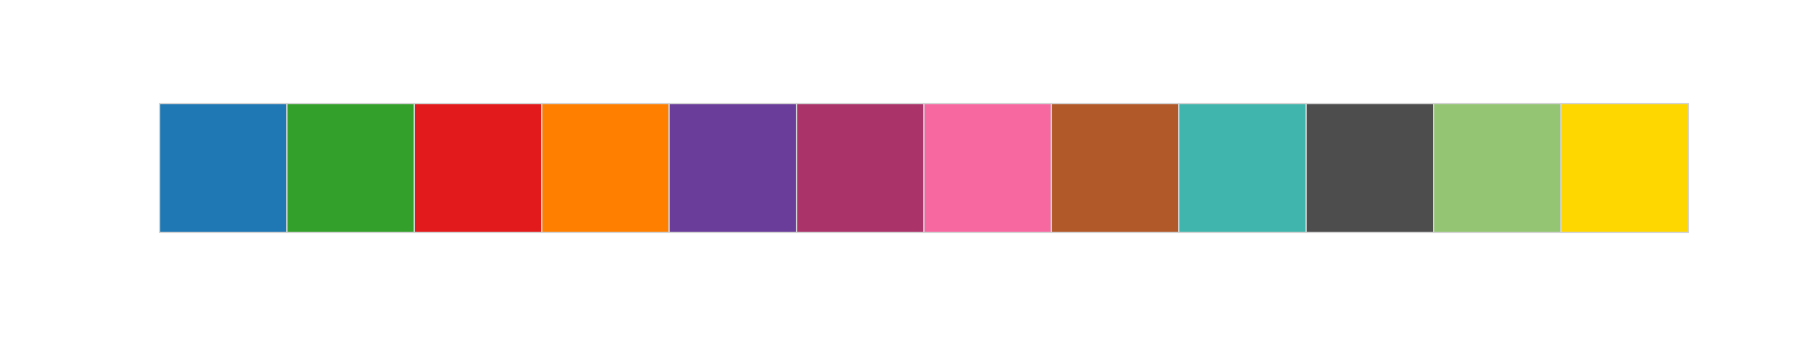

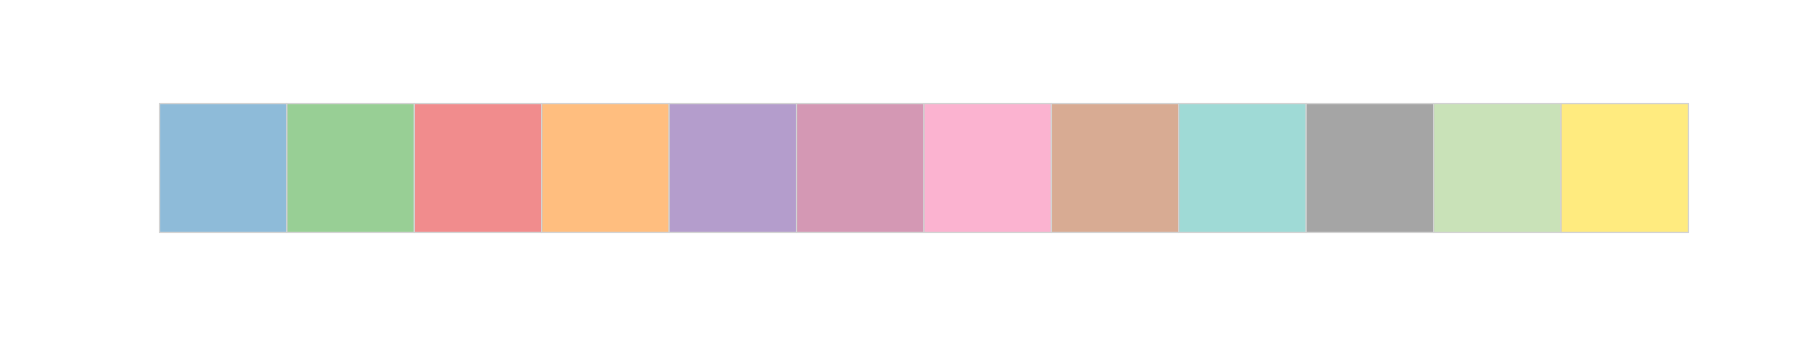

In [171]:
# Function for plotting colors side-by-side
pal <- function(col, border = "light gray", ...){
  n <- length(col)
  plot(0, 0, type="n", xlim = c(0, 1), ylim = c(0, 1),
       axes = FALSE, xlab = "", ylab = "", ...)
  rect(0:(n-1)/n, 0, 1:n/n, 1, col = col, border = border)
}

mycolors = c(
    "#1f78b4",
    "#33a02c",
    "#e31a1c",
    "#ff7f00",
    "#6a3d9a",
    "#AA336A", #Dark Pink
    "#f768a1",
    "#b15928",
    "#40B5AD", #"#8dd3c7", 
    "grey30",  #"#d9d9d9", 
    "#93C572",
    "#FFD700" #"#fdb462", 
)
options(repr.plot.height=3, repr.plot.width=15)
print(length(mycolors))
pal(mycolors)
pal(scales::alpha(mycolors, 0.5))

In [172]:
idn = unique(dat_res$Label)
tmp = data.frame(
    Label = idn,
    Color = mycolors[1:length(idn)]
)
cmap = mycolors[1:length(idn)]
names(cmap) = idn
cmap

Low-DNase CTCF-only,CTCF-bound                 pELS 
           "#1f78b4"            "#33a02c"            "#e31a1c" 
                 PLS           DNase-only                 dELS 
           "#ff7f00"            "#6a3d9a"            "#AA336A" 
     pELS,CTCF-bound       PLS,CTCF-bound      dELS,CTCF-bound 
           "#f768a1"            "#b15928"            "#40B5AD" 
       DNase-H3K4me3 
            "grey30"

In [176]:
dat = dat_res %>% 
    dplyr::filter(Source == "ASTARR")
head(dat)

CCRE,Label,Region,Source,Strand,Input,Output,FC,Log2FC
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
EH38E2753817,Low-DNase,GATA1,ASTARR,stranded_neg,1.293504e-04,2.247585e-04,1.73759464,0.7970916
EH38E2753817,Low-DNase,GATA1,ASTARR,stranded_pos,1.040677e-04,1.648701e-04,1.58425763,0.6638070
EH38E2753817,Low-DNase,GATA1,ASTARR,unstranded,2.334181e-04,3.896286e-04,1.66923046,0.7391832
EH38E2753819,Low-DNase,GATA1,ASTARR,stranded_neg,2.170848e-05,1.002631e-06,0.04618615,-4.4363960
EH38E2753819,Low-DNase,GATA1,ASTARR,stranded_pos,1.325526e-05,8.526271e-06,0.64323682,-0.6365781
EH38E2753819,Low-DNase,GATA1,ASTARR,unstranded,3.496374e-05,9.528902e-06,0.27253667,-1.8754777


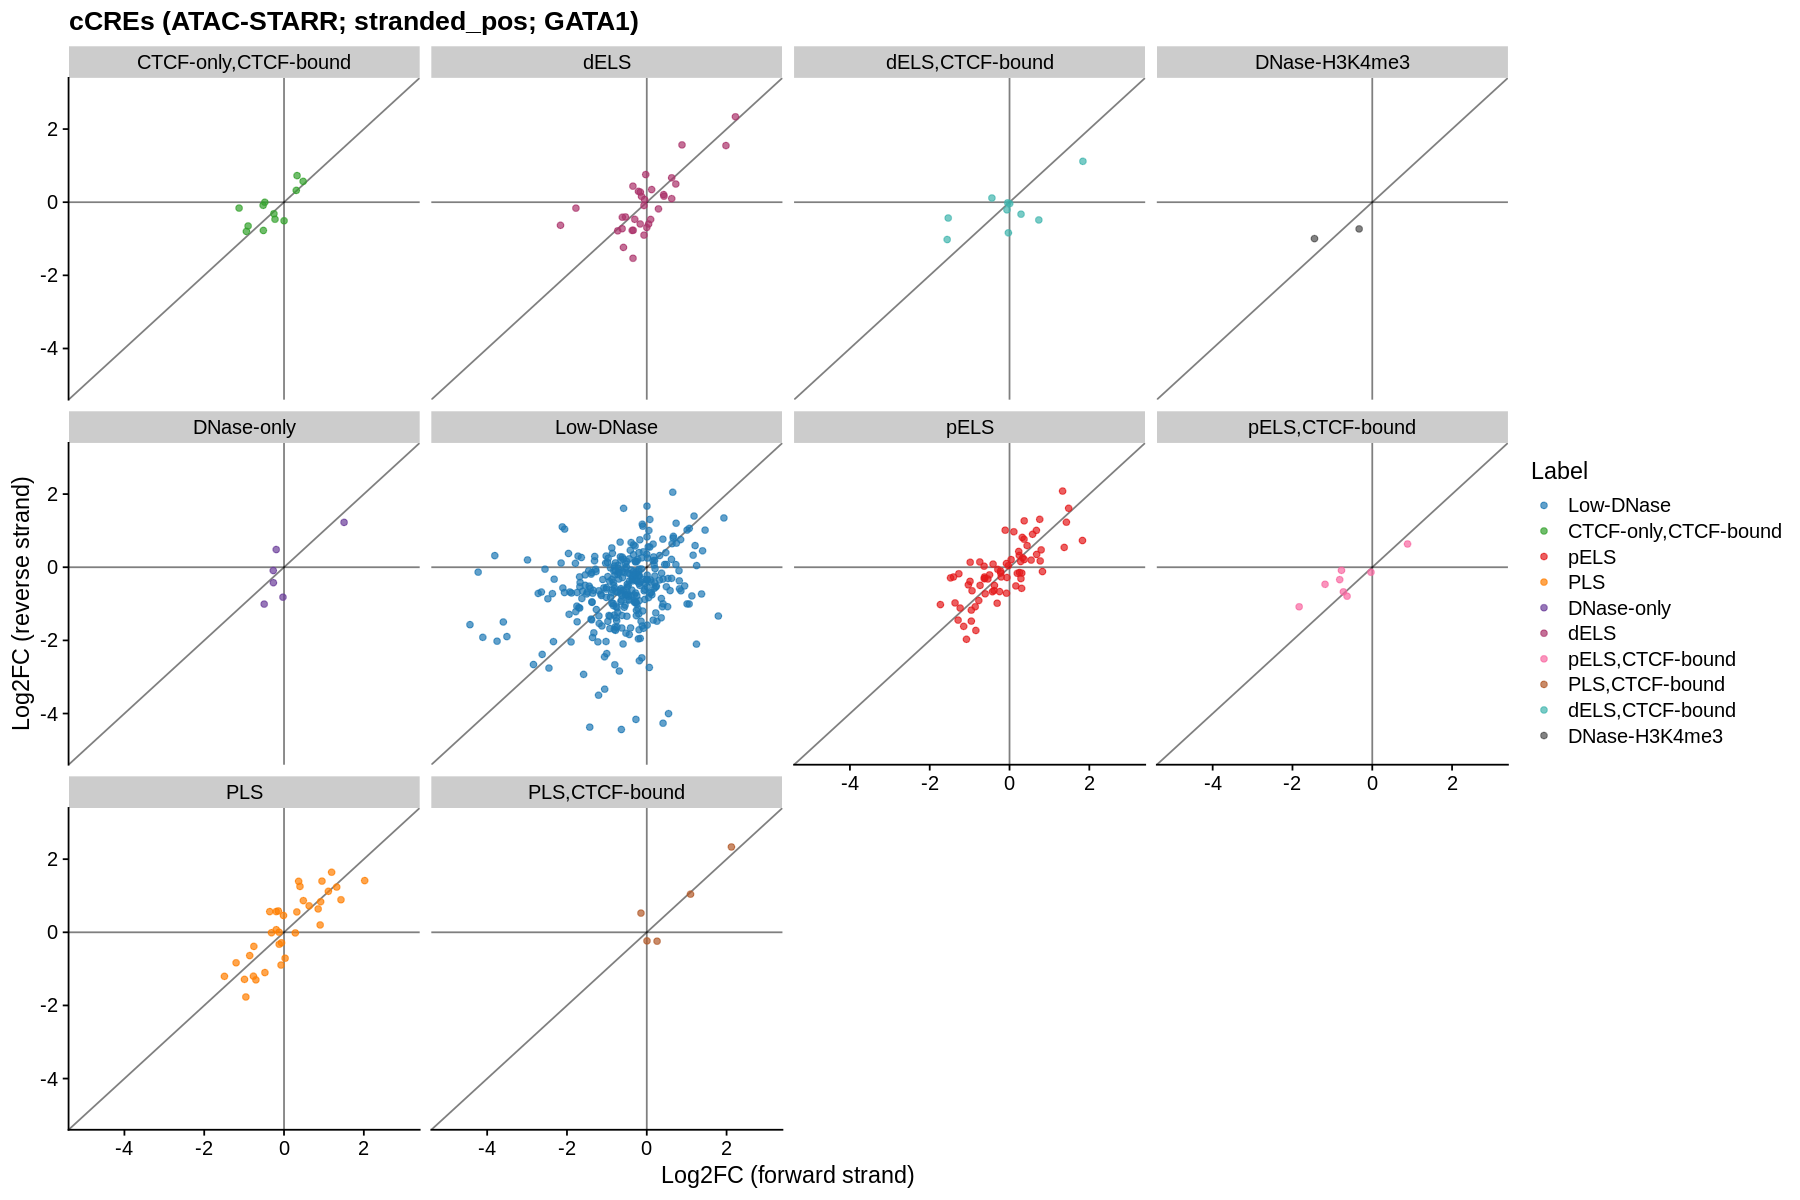

In [203]:
dat = dat_res %>% 
    dplyr::filter(Source == "ASTARR") %>%
    dplyr::select(CCRE, Label, Strand, Log2FC) %>%
    tidyr::spread(Strand, Log2FC) %>% 
    na.omit %>%
    left_join(., tmp, by="Label")

gpt = ggplot(dat, aes(x=stranded_pos, y=stranded_neg, color=Label)) +
    geom_abline(intercept = 0, slope = 1, alpha=0.5) +
    geom_hline(yintercept = 0, alpha=0.5) +
    geom_vline(xintercept = 0, alpha=0.5) +
    geom_point(size=1.5, alpha = 0.7) +
    xlim(-5, 3) +
    ylim(-5, 3) +
    labs(x="Log2FC (forward strand)", 
         y = "Log2FC (reverse strand)", 
         title="cCREs (ATAC-STARR; stranded_pos; GATA1)") +
    scale_colour_manual(name = "Label", values = cmap) +
    theme_cowplot() + facet_wrap(~Label)

options(repr.plot.height=10, repr.plot.width=15)
print(gpt)

In [200]:
dat = dat_res %>% 
    dplyr::filter(Source == "ASTARR", Strand == "stranded_pos") %>%
    #dplyr::select(CCRE, Label, Strand, Log2FC) %>%
    #na.omit %>%
    left_join(., tmp, by="Label")

head(dat)

CCRE,Label,Region,Source,Strand,Input,Output,FC,Log2FC,Color
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
EH38E2753817,Low-DNase,GATA1,ASTARR,stranded_pos,1.040677e-04,1.648701e-04,1.5842576,0.663806967,#1f78b4
EH38E2753819,Low-DNase,GATA1,ASTARR,stranded_pos,1.325526e-05,8.526271e-06,0.6432368,-0.636578099,#1f78b4
EH38E2753820,Low-DNase,GATA1,ASTARR,stranded_pos,4.254568e-05,2.467181e-05,0.5798899,-0.786149041,#1f78b4
EH38E2753821,Low-DNase,GATA1,ASTARR,stranded_pos,4.360614e-05,2.321236e-05,0.5323187,-0.909637967,#1f78b4
EH38E2753823,Low-DNase,GATA1,ASTARR,stranded_pos,1.023068e-04,1.025990e-04,1.0028563,0.004114913,#1f78b4
EH38E2753824,Low-DNase,GATA1,ASTARR,stranded_pos,2.032645e-04,3.384295e-04,1.6649712,0.735497202,#1f78b4


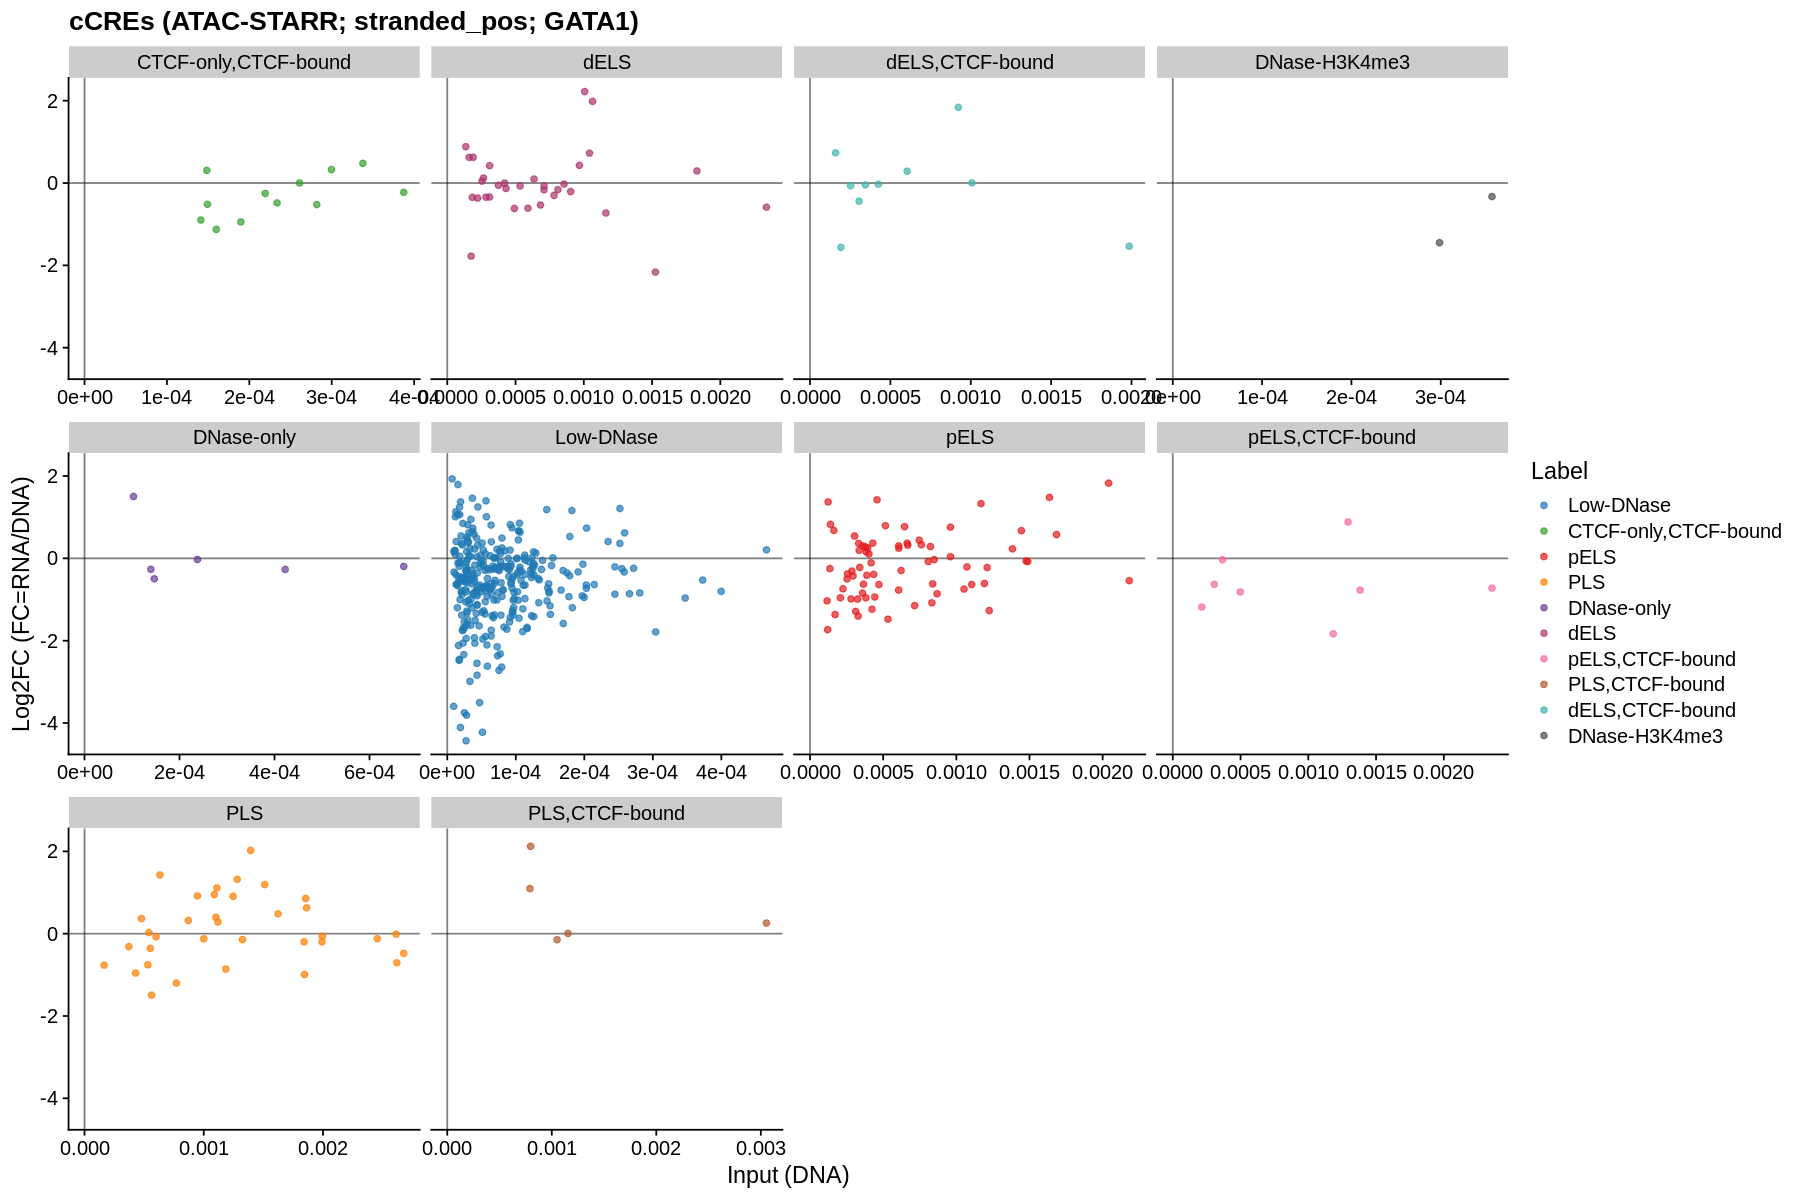

In [202]:
dat = dat_res %>% 
    dplyr::filter(Source == "ASTARR", Strand == "stranded_pos") %>%
    left_join(., tmp, by="Label")

gpt = ggplot(dat, aes(x=Input, y=Log2FC, color=Label)) +
    #geom_abline(intercept = 0, slope = 1, alpha=0.5) +
    geom_hline(yintercept = 0, alpha=0.5) +
    geom_vline(xintercept = 0, alpha=0.5) +
    geom_point(size=1.5, alpha = 0.7) +
    labs(x = "Input (DNA)", 
         y = "Log2FC (FC=RNA/DNA)", 
         title="cCREs (ATAC-STARR; stranded_pos; GATA1)") +
    scale_colour_manual(name = "Label", values = cmap) +
    theme_cowplot() + 
    facet_wrap(~Label, scale = "free_x")

options(repr.plot.height=10, repr.plot.width=15)
print(gpt)

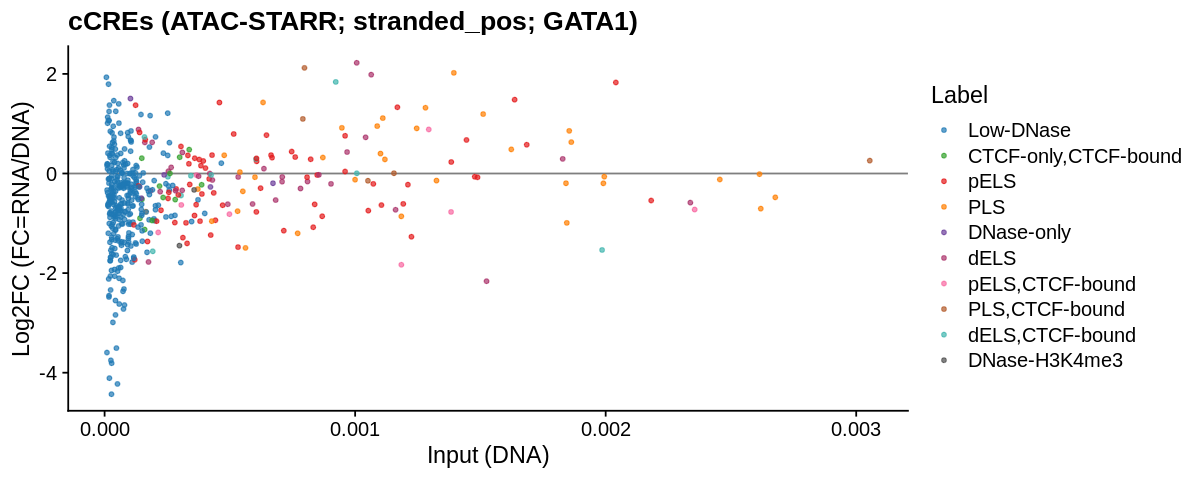

In [243]:
dat = dat_res %>% dplyr::filter(Source == "ASTARR", Strand == "stranded_pos")
gpt = ggplot(dat, aes(x=Input, y=Log2FC, color=Label)) + 
    geom_hline(yintercept = 0, alpha=0.5) +
    geom_point(size=1, alpha=0.7) + 
    theme_cowplot() +
    scale_colour_manual(name = "Label", values = cmap) +
    labs(x = "Input (DNA)", 
         y = "Log2FC (FC=RNA/DNA)", 
         title="cCREs (ATAC-STARR; stranded_pos; GATA1)")
    
options(repr.plot.height=4, repr.plot.width=10)
print(gpt)

In [251]:
dat = dat_res %>% 
    dplyr::filter(Source == "ASTARR", Strand == "stranded_pos", Label != "Low-DNase") %>%
    mutate(isCTCF = str_detect(Label, "CTCF"))

head(dat)

CCRE,Label,Region,Source,Strand,Input,Output,FC,Log2FC,isCTCF
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
EH38E2753827,"CTCF-only,CTCF-bound",GATA1,ASTARR,stranded_pos,0.0001598207,7.323064e-05,0.4582049,-1.1259354,TRUE
EH38E2753833,"CTCF-only,CTCF-bound",GATA1,ASTARR,stranded_pos,0.0001410900,7.563241e-05,0.5360580,-0.8995390,TRUE
EH38E2753835,pELS,GATA1,ASTARR,stranded_pos,0.0006643828,8.575589e-04,1.2907601,0.3682209,FALSE
EH38E2753836,PLS,GATA1,ASTARR,stranded_pos,0.0013938623,5.659011e-03,4.0599501,2.0214620,FALSE
EH38E2753858,DNase-only,GATA1,ASTARR,stranded_pos,0.0004224875,3.504140e-04,0.8294069,-0.2698481,FALSE
EH38E2753859,DNase-only,GATA1,ASTARR,stranded_pos,0.0006720531,5.868285e-04,0.8731876,-0.1956365,FALSE


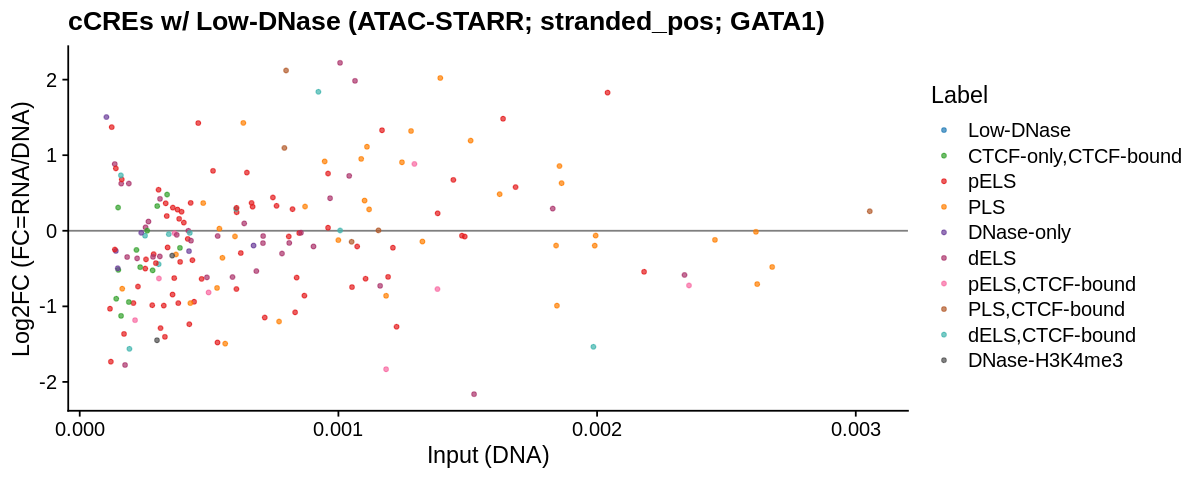

In [246]:
dat = dat_res %>% dplyr::filter(Source == "ASTARR", Strand == "stranded_pos", Label != "Low-DNase")
gpt = ggplot(dat, aes(x=Input, y=Log2FC, color=Label)) + 
    geom_hline(yintercept = 0, alpha=0.5) +
    geom_point(size=1, alpha=0.7) + 
    theme_cowplot() +
    scale_colour_manual(name = "Label", values = cmap) +
    labs(x = "Input (DNA)", 
         y = "Log2FC (FC=RNA/DNA)", 
         title="cCREs w/ Low-DNase (ATAC-STARR; stranded_pos; GATA1)")
    
options(repr.plot.height=4, repr.plot.width=10)
print(gpt)

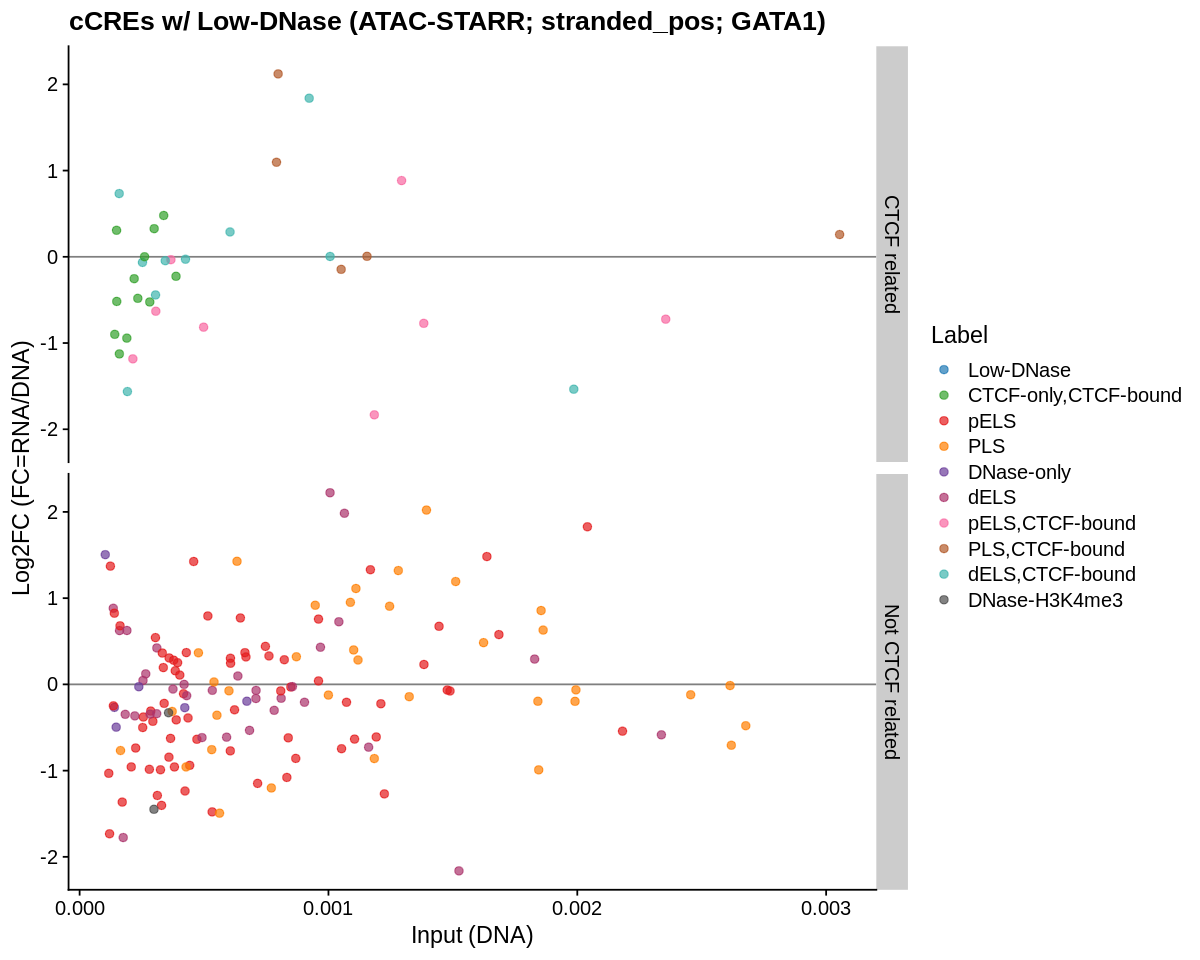

In [257]:
dat = dat_res %>% 
    dplyr::filter(Source == "ASTARR", Strand == "stranded_pos", Label != "Low-DNase") %>%
    mutate(isCTCF = str_detect(Label, "CTCF")) %>%
    mutate(isCTCF = ifelse(isCTCF, "CTCF related", "Not CTCF related"))

gpt = ggplot(dat, aes(x=Input, y=Log2FC, color=Label)) + 
    geom_hline(yintercept = 0, alpha=0.5) +
    geom_point(size=2, alpha=0.7) + 
    theme_cowplot() +
    scale_colour_manual(name = "Label", values = cmap) +
    labs(x = "Input (DNA)", 
         y = "Log2FC (FC=RNA/DNA)", 
         title="cCREs w/ Low-DNase (ATAC-STARR; stranded_pos; GATA1)") +
    facet_grid(isCTCF~.)
    
options(repr.plot.height=8, repr.plot.width=10)
print(gpt)

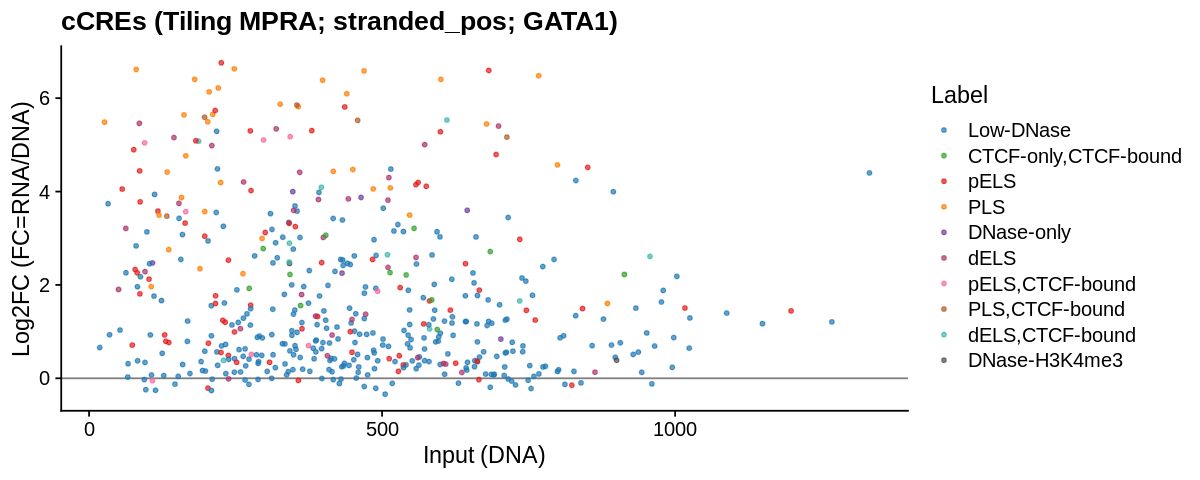

In [194]:
dat = dat_res %>% dplyr::filter(Source == "TMPRA", Strand == "stranded_pos")
gpt = ggplot(dat, aes(x=Input, y=Log2FC, color=Label)) + 
    geom_hline(yintercept = 0, alpha=0.5) +
    geom_point(size=1, alpha=0.7) + 
    theme_cowplot() +
    scale_colour_manual(name = "Label", values = cmap) +
    labs(x = "Input (DNA)", 
         y = "Log2FC (FC=RNA/DNA)", 
         title="cCREs (Tiling MPRA; stranded_pos; GATA1)")
    
options(repr.plot.height=4, repr.plot.width=10)
print(gpt)

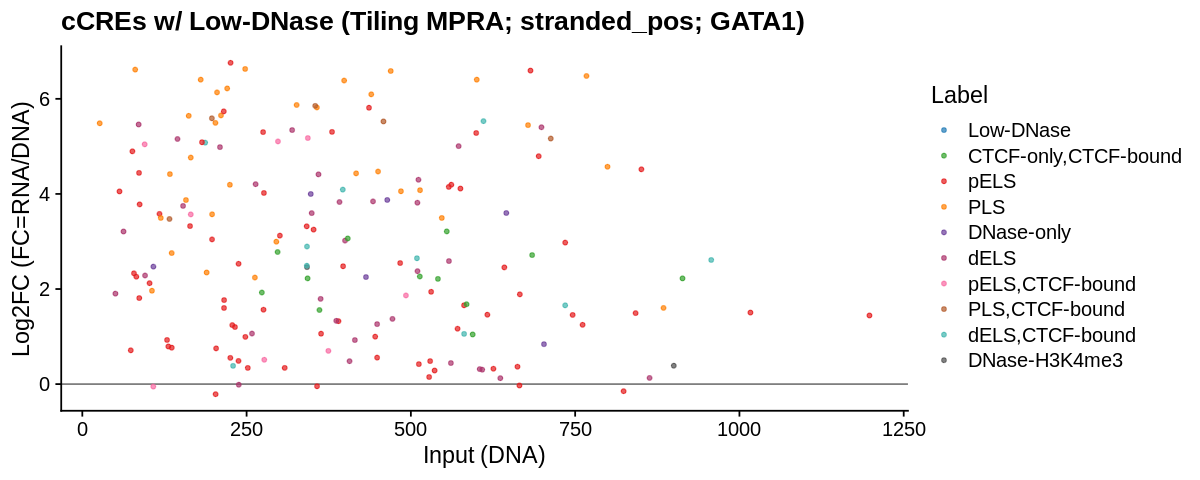

In [247]:
dat = dat_res %>% dplyr::filter(Source == "TMPRA", Strand == "stranded_pos",  Label != "Low-DNase")
gpt = ggplot(dat, aes(x=Input, y=Log2FC, color=Label)) + 
    geom_hline(yintercept = 0, alpha=0.5) +
    geom_point(size=1, alpha=0.7) + 
    theme_cowplot() +
    scale_colour_manual(name = "Label", values = cmap) +
    labs(x = "Input (DNA)", 
         y = "Log2FC (FC=RNA/DNA)", 
         title="cCREs w/ Low-DNase (Tiling MPRA; stranded_pos; GATA1)")
    
options(repr.plot.height=4, repr.plot.width=10)
print(gpt)

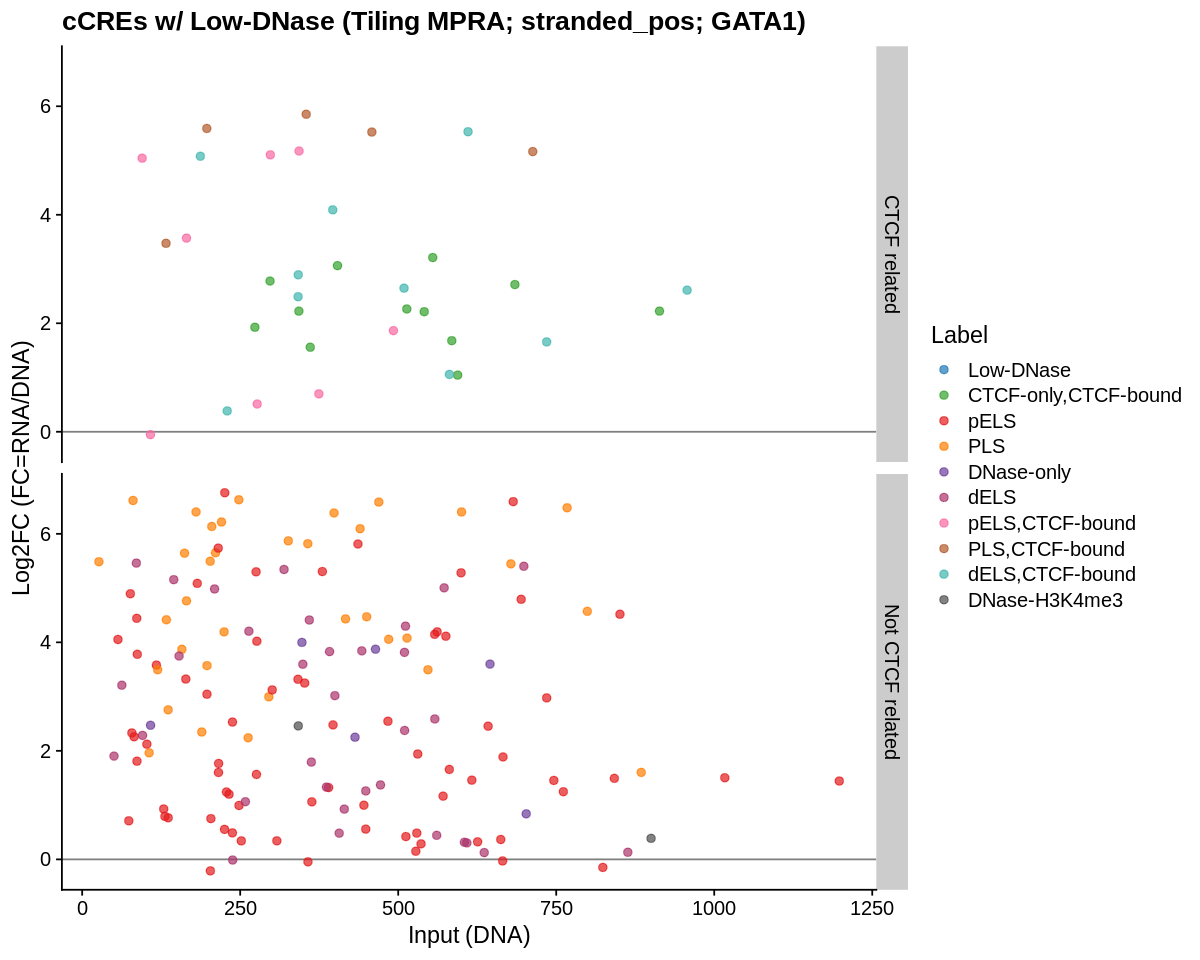

In [258]:
dat = dat_res %>% 
    dplyr::filter(Source == "TMPRA", Strand == "stranded_pos",  Label != "Low-DNase") %>%
    mutate(isCTCF = str_detect(Label, "CTCF")) %>%
    mutate(isCTCF = ifelse(isCTCF, "CTCF related", "Not CTCF related"))

gpt = ggplot(dat, aes(x=Input, y=Log2FC, color=Label)) + 
    geom_hline(yintercept = 0, alpha=0.5) +
    geom_point(size=2, alpha=0.7) + 
    theme_cowplot() +
    scale_colour_manual(name = "Label", values = cmap) +
    labs(x = "Input (DNA)", 
         y = "Log2FC (FC=RNA/DNA)", 
         title="cCREs w/ Low-DNase (Tiling MPRA; stranded_pos; GATA1)") +
    facet_grid(isCTCF~.)
    
options(repr.plot.height=8, repr.plot.width=10)
print(gpt)

In [205]:
head(dat_res)

CCRE,Label,Region,Source,Strand,Input,Output,FC,Log2FC
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
EH38E2753817,Low-DNase,GATA1,ASTARR,stranded_neg,1.293504e-04,2.247585e-04,1.73759464,0.7970916
EH38E2753817,Low-DNase,GATA1,ASTARR,stranded_pos,1.040677e-04,1.648701e-04,1.58425763,0.6638070
EH38E2753817,Low-DNase,GATA1,TMPRA,stranded_pos,1.593391e+02,1.344879e+03,8.44036069,3.0773047
EH38E2753817,Low-DNase,GATA1,ASTARR,unstranded,2.334181e-04,3.896286e-04,1.66923046,0.7391832
EH38E2753819,Low-DNase,GATA1,ASTARR,stranded_neg,2.170848e-05,1.002631e-06,0.04618615,-4.4363960
EH38E2753819,Low-DNase,GATA1,ASTARR,stranded_pos,1.325526e-05,8.526271e-06,0.64323682,-0.6365781


In [226]:
###
dat = dat_res %>% 
    dplyr::filter(Strand == "stranded_pos") %>%
    dplyr::select(CCRE, Label, Region, Source, Input) %>%
    tidyr::spread(Source, Input)

###
#dat$Input_Z_ASTARR = (dat$ASTARR - mean(dat$ASTARR)) / sd(dat$ASTARR)
#dat$Input_Z_TMPRA  = (dat$TMPRA  - mean(dat$TMPRA))  / sd(dat$TMPRA)
dat = dat %>% 
    dplyr::rename(
        Input_ASTARR = ASTARR,
        Input_TMPRA  = TMPRA)

###
dat_inp = dat
print(dim(dat))
head(dat)

[1] 507   5


CCRE,Label,Region,Input_ASTARR,Input_TMPRA
<chr>,<chr>,<chr>,<dbl>,<dbl>
EH38E2753817,Low-DNase,GATA1,1.040677e-04,159.3391
EH38E2753819,Low-DNase,GATA1,1.325526e-05,723.1672
EH38E2753820,Low-DNase,GATA1,4.254568e-05,474.8961
EH38E2753821,Low-DNase,GATA1,4.360614e-05,606.7173
EH38E2753823,Low-DNase,GATA1,1.023068e-04,366.2396
EH38E2753824,Low-DNase,GATA1,2.032645e-04,359.8622


In [228]:
###
dat = dat_res %>% 
    dplyr::filter(Strand == "stranded_pos") %>%
    dplyr::select(CCRE, Label, Region, Source, Log2FC) %>%
    tidyr::spread(Source, Log2FC) 

###
#dat$FC_Z_ASTARR = (dat$ASTARR - mean(dat$ASTARR)) / sd(dat$ASTARR)
#dat$FC_Z_TMPRA  = (dat$TMPRA  - mean(dat$TMPRA))  / sd(dat$TMPRA)
dat = dat %>%
    dplyr::rename(
        Log2FC_ASTARR = ASTARR,
        Log2FC_TMPRA  = TMPRA)

###
dat_lfc = dat
print(dim(dat))
head(dat)

[1] 507   5


CCRE,Label,Region,Log2FC_ASTARR,Log2FC_TMPRA
<chr>,<chr>,<chr>,<dbl>,<dbl>
EH38E2753817,Low-DNase,GATA1,0.663806967,3.07730465
EH38E2753819,Low-DNase,GATA1,-0.636578099,0.57974671
EH38E2753820,Low-DNase,GATA1,-0.786149041,0.44416068
EH38E2753821,Low-DNase,GATA1,-0.909637967,0.08660604
EH38E2753823,Low-DNase,GATA1,0.004114913,1.96440887
EH38E2753824,Low-DNase,GATA1,0.735497202,3.01589519


In [229]:
dat = left_join(dat_inp, dat_lfc, by=c("CCRE", "Label", "Region"))

print(dim(dat))
head(dat)

[1] 507   7


CCRE,Label,Region,Input_ASTARR,Input_TMPRA,Log2FC_ASTARR,Log2FC_TMPRA
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
EH38E2753817,Low-DNase,GATA1,1.040677e-04,159.3391,0.663806967,3.07730465
EH38E2753819,Low-DNase,GATA1,1.325526e-05,723.1672,-0.636578099,0.57974671
EH38E2753820,Low-DNase,GATA1,4.254568e-05,474.8961,-0.786149041,0.44416068
EH38E2753821,Low-DNase,GATA1,4.360614e-05,606.7173,-0.909637967,0.08660604
EH38E2753823,Low-DNase,GATA1,1.023068e-04,366.2396,0.004114913,1.96440887
EH38E2753824,Low-DNase,GATA1,2.032645e-04,359.8622,0.735497202,3.01589519


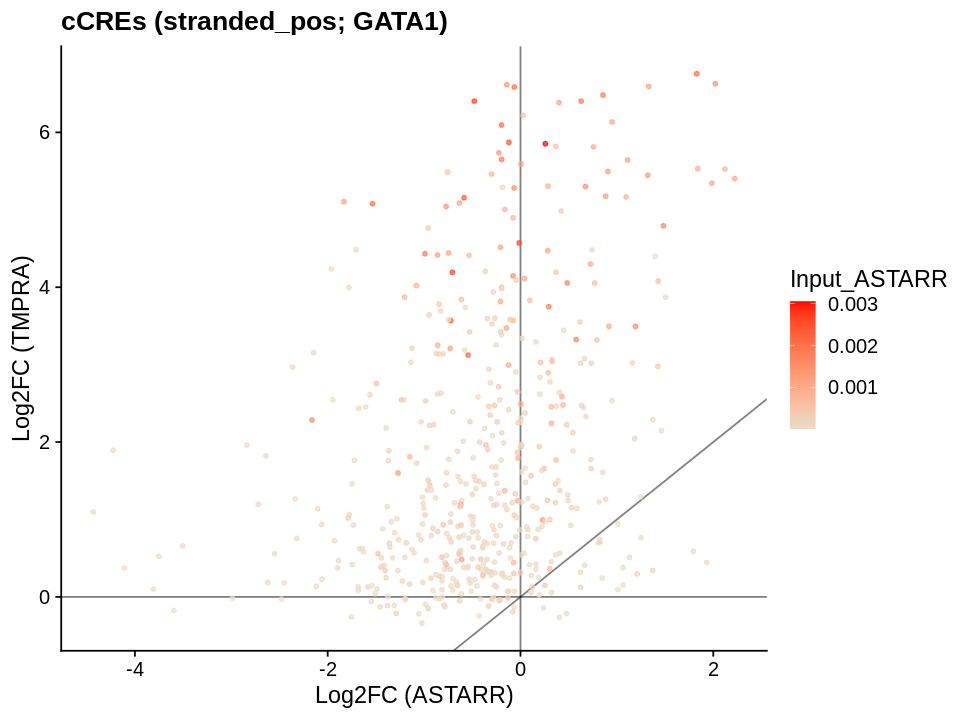

In [242]:
gpt = ggplot(dat, aes(x=Log2FC_ASTARR, y=Log2FC_TMPRA, color=Input_ASTARR)) +
    geom_abline(intercept = 0, slope = 1, alpha=0.5) +
    geom_hline(yintercept = 0, alpha=0.5) +
    geom_vline(xintercept = 0, alpha=0.5) +
    geom_point(size=1, alpha=0.7) +
    scale_color_gradient(low="#EADDCA", high="red") +
    theme_cowplot() +
    labs(x = "Log2FC (ASTARR)", 
         y = "Log2FC (TMPRA)", 
         title="cCREs (stranded_pos; GATA1)")

options(repr.plot.height=6, repr.plot.width=8)
print(gpt)

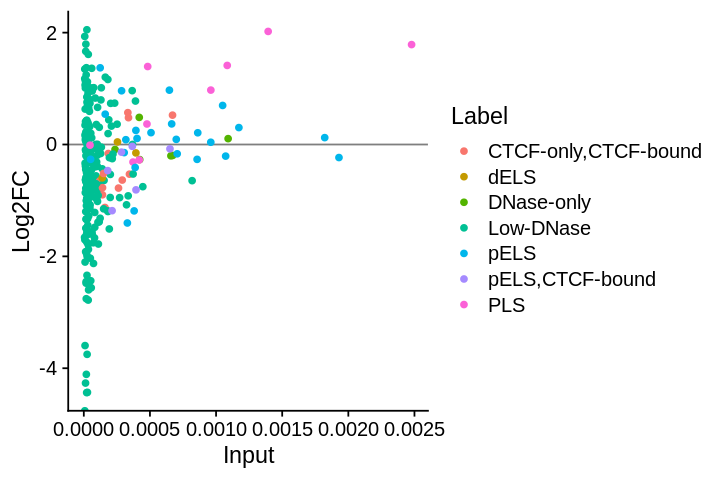

In [19]:
dat = res %>% dplyr::filter(Strand == "unstranded")
gpt = ggplot(dat, aes(x=Input, y=Log2FC, color=Label)) + 
    geom_hline(yintercept = 0, alpha=0.5) +
    geom_point() + 
    theme_cowplot()

options(repr.plot.height=4, repr.plot.width=6)
print(gpt)

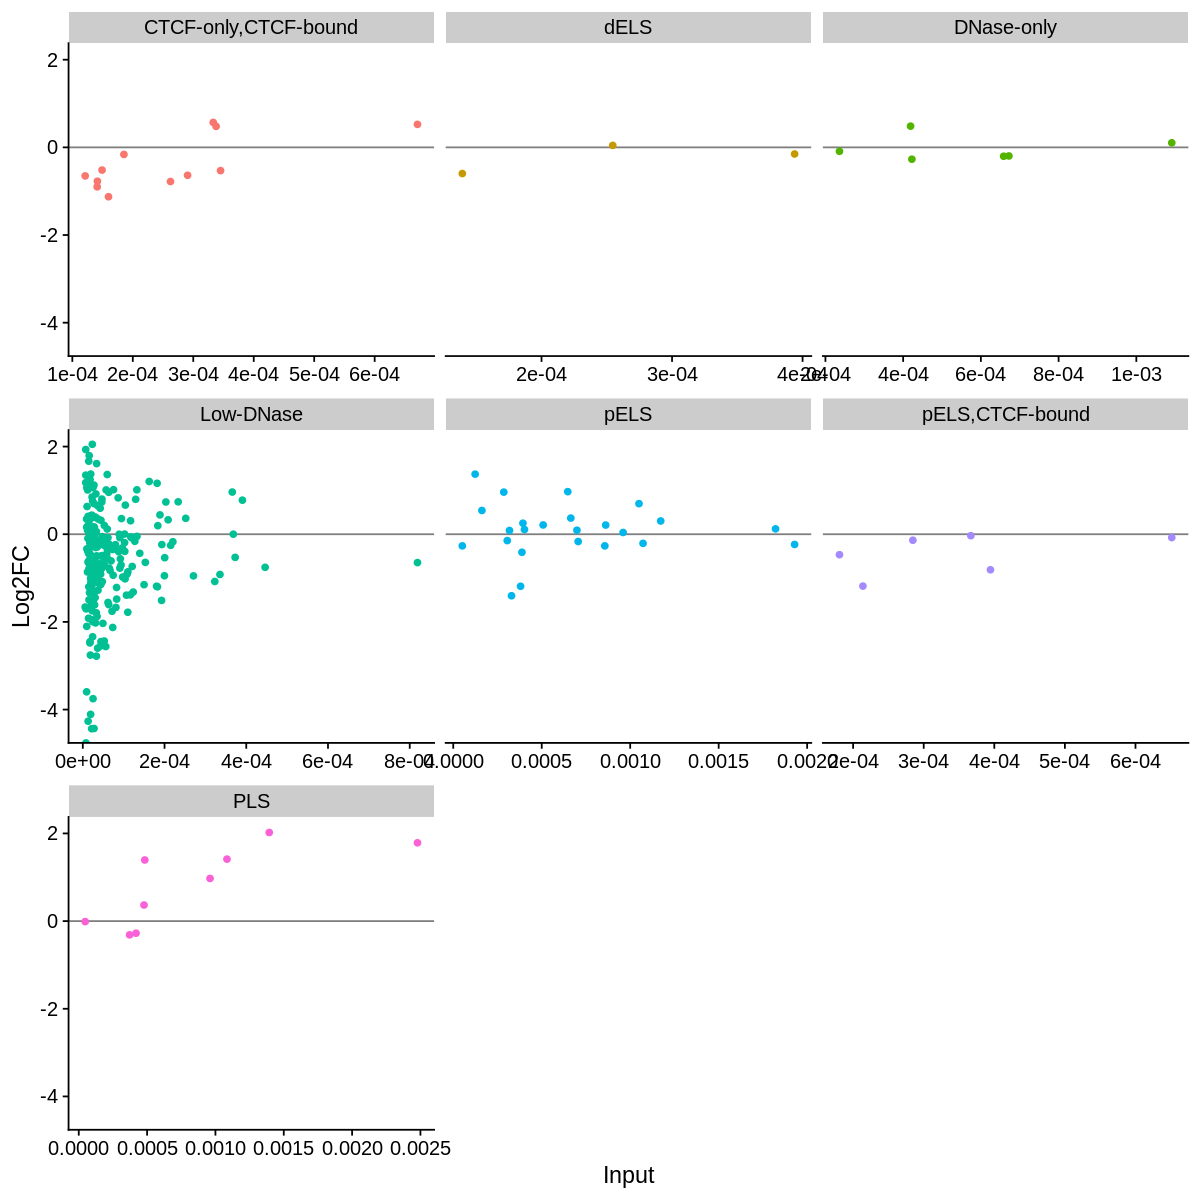

In [23]:
options(repr.plot.height=10, repr.plot.width=10)
gpt + facet_wrap(~Label, scales = "free_x") + theme(legend.position = "None")

In [5]:
###
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Ratio.GATA1.unstranded.perbase.tsv"
fpath = file.path(fdiry, fname)

dat_astarr_gata1 = read_tsv(fpath, show_col_types = FALSE)
head(dat_astarr_gata1)

Chrom,Loc,Input,Output,FC_out00_inp01,FC_out01_inp01,FC_out10_inp10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786400,0,0,0,1,1
chrX,47786401,0,0,0,1,1
chrX,47786402,0,0,0,1,1
chrX,47786403,0,0,0,1,1
chrX,47786404,0,0,0,1,1
chrX,47786405,0,0,0,1,1


In [6]:
dat = dat_astarr_gata1
print(range(dat$Loc))

[1] 47786400 49786749


In [11]:
dat = dat_ccre %>% dplyr::filter(Chrom == "chrX", Start >= 47786400, End <= 49786750)

dat_ccre_gata1 = dat
print(dim(dat))
head(dat)

[1] 507   5


Chrom,Start,End,Name,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>
chrX,47796557,47796905,EH38E2753817,Low-DNase
chrX,47798996,47799283,EH38E2753819,Low-DNase
chrX,47802599,47802936,EH38E2753820,Low-DNase
chrX,47803145,47803428,EH38E2753821,Low-DNase
chrX,47806265,47806603,EH38E2753823,Low-DNase
chrX,47806645,47806957,EH38E2753824,Low-DNase


----

In [12]:
tmp = dat_ccre_gata1 %>% head
tmp

Chrom,Start,End,Name,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>
chrX,47796557,47796905,EH38E2753817,Low-DNase
chrX,47798996,47799283,EH38E2753819,Low-DNase
chrX,47802599,47802936,EH38E2753820,Low-DNase
chrX,47803145,47803428,EH38E2753821,Low-DNase
chrX,47806265,47806603,EH38E2753823,Low-DNase
chrX,47806645,47806957,EH38E2753824,Low-DNase


In [17]:
x = tmp[1,]
x["Start"]

Start
<dbl>
47796557


In [18]:
x = as.vector(tmp[1,])
x["Start"]

$Start
[1] 47796557

In [15]:
dat = dat_astarr_gata1 %>% dplyr::filter(Loc >= x["Start"], Loc <= x["End"])
xinp = mean(dat$Input)
xout = mean(dat$Output)
print(c(xinp, xout))

[1] 0.0002329681 0.0003887556


In [39]:
x = as.vector(tmp[2,])
x["Start"]

$Start
[1] 47798996

In [40]:
dat = dat_astarr_gata1 %>% dplyr::filter(Loc >= x["Start"], Loc <= x["End"])
xinp = mean(dat$Input)
xout = mean(dat$Output)
print(c(xinp, xout))

[1] 3.490303e-05 9.521122e-06


In [44]:
res = lapply(1:nrow(tmp), function(idx){
    x    = as.vector(dat_ccre_gata1[idx,])
    dat  = dat_astarr_gata1 %>% dplyr::filter(Loc >= x["Start"], Loc <= x["End"])
    
    x$Input  = mean(dat$Input)
    x$Output = mean(dat$Output)
    
    return(x)
})
res = bind_rows(res)
res

Chrom,Start,End,Name,Label,Input,Output
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
chrX,47796557,47796905,EH38E2753817,Low-DNase,2.329681e-04,3.887556e-04
chrX,47798996,47799283,EH38E2753819,Low-DNase,3.490303e-05,9.521122e-06
chrX,47802599,47802936,EH38E2753820,Low-DNase,1.021120e-04,8.948429e-05
chrX,47803145,47803428,EH38E2753821,Low-DNase,1.101788e-04,6.081133e-05
chrX,47806265,47806603,EH38E2753823,Low-DNase,1.891878e-04,2.575489e-04
chrX,47806645,47806957,EH38E2753824,Low-DNase,3.655550e-04,7.119706e-04


In [45]:
res = lapply(1:nrow(dat_ccre_gata1), function(idx){
    x    = as.vector(dat_ccre_gata1[idx,])
    dat  = dat_astarr_gata1 %>% dplyr::filter(Loc >= x["Start"], Loc <= x["End"])
    
    x$Input  = mean(dat$Input)
    x$Output = mean(dat$Output)
    
    return(x)
})
res = bind_rows(res)
res

Chrom,Start,End,Name,Label,Input,Output
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
chrX,47796557,47796905,EH38E2753817,Low-DNase,2.329681e-04,3.887556e-04
chrX,47798996,47799283,EH38E2753819,Low-DNase,3.490303e-05,9.521122e-06
chrX,47802599,47802936,EH38E2753820,Low-DNase,1.021120e-04,8.948429e-05
chrX,47803145,47803428,EH38E2753821,Low-DNase,1.101788e-04,6.081133e-05
chrX,47806265,47806603,EH38E2753823,Low-DNase,1.891878e-04,2.575489e-04
chrX,47806645,47806957,EH38E2753824,Low-DNase,3.655550e-04,7.119706e-04
chrX,47807630,47807970,EH38E2753826,Low-DNase,2.149952e-04,1.801922e-04
chrX,47814932,47815157,EH38E2753827,"CTCF-only,CTCF-bound",3.449964e-04,2.385034e-04
chrX,47815924,47816269,EH38E2753829,Low-DNase,9.198921e-05,6.245460e-05


In [53]:
print(range(res$Input))
print(range(res$Output))

[1] 1.448815e-05 5.802268e-03
[1] 4.814190e-06 1.167783e-02


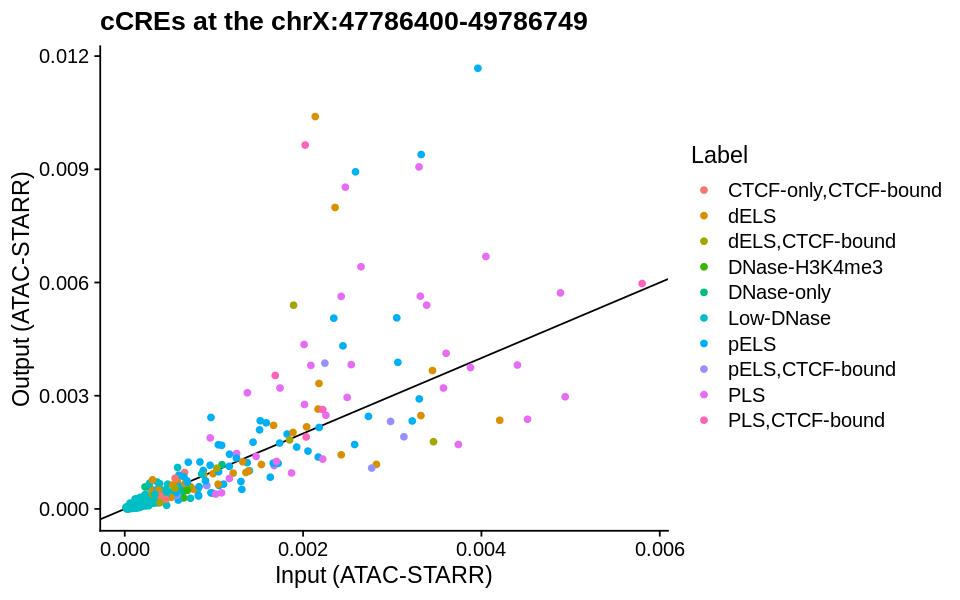

In [58]:
dat = res
gpt = ggplot(dat, aes(x=Input, y=Output, color=Label)) + 
    geom_abline(intercept = 0, slope = 1) +
    geom_point() + 
    theme_cowplot() + 
    labs(title = "cCREs at the chrX:47786400-49786749",
         x="Input (ATAC-STARR)", y = "Output (ATAC-STARR)")

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

In [52]:
tmp = res
tmp$FC = tmp$Output / tmp$Input
head(tmp)

Chrom,Start,End,Name,Label,Input,Output,FC
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chrX,47796557,47796905,EH38E2753817,Low-DNase,2.329681e-04,3.887556e-04,1.6687075
chrX,47798996,47799283,EH38E2753819,Low-DNase,3.490303e-05,9.521122e-06,0.2727878
chrX,47802599,47802936,EH38E2753820,Low-DNase,1.021120e-04,8.948429e-05,0.8763346
chrX,47803145,47803428,EH38E2753821,Low-DNase,1.101788e-04,6.081133e-05,0.5519330
chrX,47806265,47806603,EH38E2753823,Low-DNase,1.891878e-04,2.575489e-04,1.3613399
chrX,47806645,47806957,EH38E2753824,Low-DNase,3.655550e-04,7.119706e-04,1.9476430


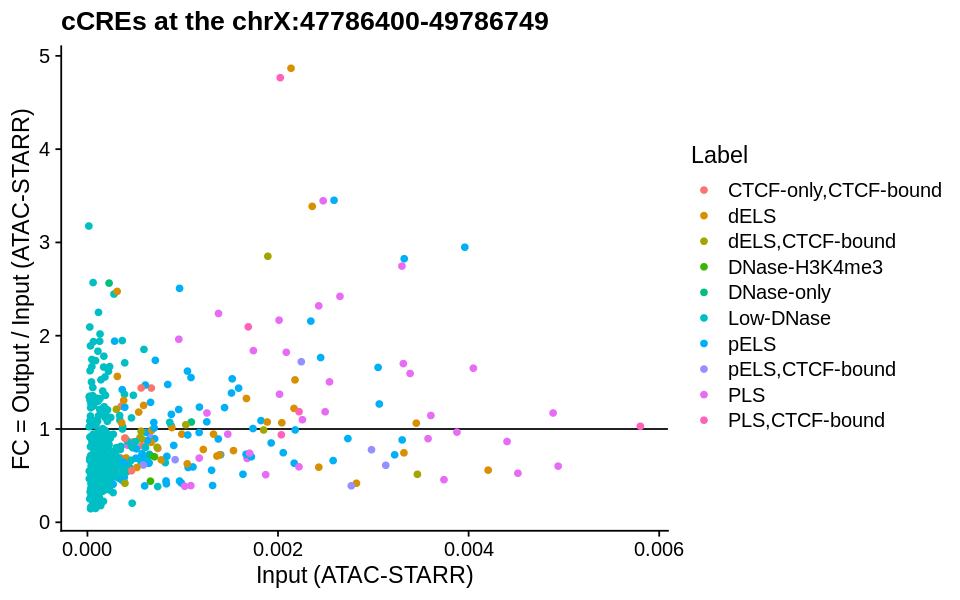

In [56]:
dat = tmp
gpt = ggplot(dat, aes(x=Input, y=FC, color=Label)) + 
    geom_hline(yintercept = 1) +
    geom_point() + 
    theme_cowplot() + 
    labs(
        title = "cCREs at the chrX:47786400-49786749",
        x = "Input (ATAC-STARR)", 
        y = "FC = Output / Input (ATAC-STARR)")

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

In [66]:
tmp2 = tmp %>% dplyr::filter(FC > 4)
tmp2

Chrom,Start,End,Name,Label,Input,Output,FC
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chrX,48574722,48575072,EH38E2754037,"PLS,CTCF-bound",0.002023308,0.009643147,4.766030
chrX,49148741,49149086,EH38E2754369,dELS,0.002136344,0.010397686,4.867046


In [79]:
dat = dat_astarr_gata1
dat = dat %>% dplyr::filter(Loc>=48574000, Loc<=48576000)
tmp2 = tmp %>% dplyr::filter(FC > 4)
tmp2 = tmp2[1,]

gp1 = ggplot() + 
    geom_rect(
        data = tmp2[1,], 
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf), 
        fill="red", alpha=0.5) +
    geom_point(
        data = dat, 
        aes(x=Loc, y=Input), size=1) + 
    theme_cowplot()
gp2 = ggplot() + 
    geom_rect(
        data = tmp2, 
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf), 
        fill="red", alpha=0.5) +
    geom_point(
        data = dat, aes(x=Loc, y=Output), size=1) + 
    theme_cowplot()

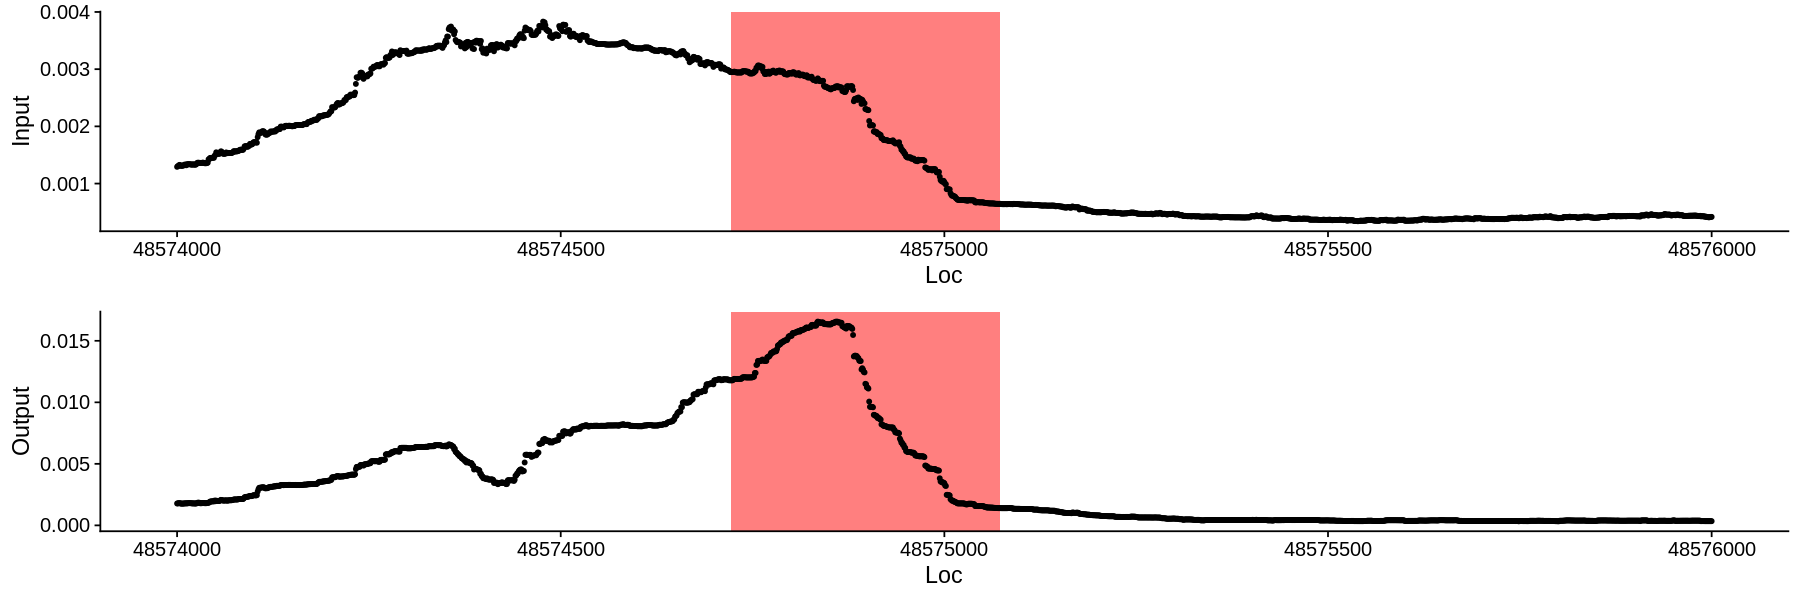

In [80]:
options(repr.plot.height=5, repr.plot.width=15)
plot_grid(gp1, gp2, align="v", ncol=1)

In [ ]:
dat = dat_astarr_gata1
dat = dat %>% dplyr::filter(Loc>=48574700, Loc<=49149090)
gp1 = ggplot() + 
    geom_rect(
        data = tmp2, 
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf), 
        fill="red", alpha=0.5) +
    geom_point(
        data = dat, 
        aes(x=Loc, y=Input), size=1) + 
    theme_cowplot()
gp2 = ggplot() + 
    geom_rect(
        data = tmp2, 
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf), 
        fill="red", alpha=0.5) +
    geom_point(
        data = dat, aes(x=Loc, y=Output), size=1) + 
    theme_cowplot()

In [ ]:
options(repr.plot.height=5, repr.plot.width=15)
plot_grid(gp1, gp2, align="v", ncol=1)